# Đồ án thực hành Nhập môn Khoa học Dữ liệu

### Nhóm: 12
### Thành viên:
20120632: Trần Thái Vỹ

## **Mô tả đồ án:**
- Thu thập dữ liệu của 10000 anime trên website.
- Từ dữ liệu thu thập được tiến hành phân tích, khám phá, xử lý và đưa ra mô hình phù hợp.

#### **Nguồn:**  [myanimelist.net](https://myanimelist.net)

## Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime
import warnings
warnings.simplefilter('ignore')
sns.set_theme()

## Thu thập dữ liệu

### Thông tin về dữ liệu

- Dữ liệu được sử dụng trong đồ án là tập dữ liệu về các **bộ anime** với những thông tin được lưu trữ liên quan tới những yếu tố được quan tâm với một bộ phim hoạt hình.
- Tập dữ liệu được cào và download trực tiếp thông qua [đường dẫn](https://myanimelist.net/anime.php).

### Dữ liệu được thu thập thế nào ?

- Nhóm tiến hành crawl dữ liệu với thư viện scrapy.
- Ở đây nhóm không crawl hết toàn bộ các anime mà chỉ crawl 10000 bộ nổi nhất được sắp xếp trên web.

## Khám phá dữ liệu

### Đọc dữ liệu từ file json vào dataframe

Dữ liệu sau khi thu thập được lưu duy nhất trong 1 file JSON duy nhất là dataset/animes_info.json

In [2]:
anime_df = pd.read_json('anime_crawler/anime_crawler/dataset/animes_info.json')

In [3]:
anime_df.head()

,Name,Score,Rank,Type,Episodes,Aired,Premiered,Producers,Studios,Genres,Popularity,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,9.11,1,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"[Mainichi Broadcasting System, Studio Moriken,...",[Bones],"[Adventure, Drama, Fantasy, Action]",#3,"3,037,641","211,082"
1,Bleach: Sennen Kessen-hen,9.10,2,TV,13,"Oct 11, 2022 to Dec 27, 2022",Fall 2022,"[TV Tokyo, Shueisha, Dentsu, Aniplex]",[Pierrot],"[Adventure, Fantasy, Action]",#669,"310,979","11,798"
2,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.09,3,TV,13,"Apr 9, 2022 to Jun 25, 2022",Spring 2022,"[JR East Marketing & Communications, Mainichi ...",[A-1 Pictures],"[Comedy, Romance]",#238,"703,336","25,895"
3,Steins;Gate,9.08,4,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"[Movic, AT-X, Nitroplus, Kadokawa Pictures Jap...",[White Fox],"[Drama, Sci-Fi, Suspense]",#13,"2,338,343","177,381"
4,Gintama°,9.07,5,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"[TV Tokyo, Dentsu, Aniplex]",[Bandai Namco Pictures],"[Sci-Fi, Comedy, Action]",#337,"567,213","15,323"


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Tiến hành tính số dòng và số cột rồi lưu vào 2 biến `num_rows` và `num_cols`.

In [4]:
num_rows = len(anime_df.axes[0])
num_cols = len(anime_df.axes[1])

In [5]:
print('Số dòng: ', num_rows)
print('Số cột:' , num_cols)

Số dòng:  10000
Số cột: 13


**Nhận xét:**
* Tập dữ liệu gồm 10000 dòng và 13 cột.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng là thông tin của một bộ anime với các trường giống nhau nhưng dữ liệu bên trong là riêng biệt.
- Các dòng không có ý nghĩa khác nhau
- Mỗi dòng đại diện cho một bộ phim nhất định với những yếu tố khác nhau để thể hiện cái nhìn khách quan nhất cho người xem.

### Dữ liệu các dòng có bị lặp không?

Tiến hành kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.

In [6]:
have_duplicated_rows=anime_df.Name.duplicated().any()
if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


### Mỗi cột có ý nghĩa gì?

|Column Name    | Meaning      |
|---------------|-----------------------------------------------------------------------------|
|Name           |Tên anime                                                                    |
|Score          |Số điểm trung bình được đánh giá bởi cộng đồng người dùng của anime đó       |
|Rank           |Thứ hạng của anime                                                           |
|Type           |Loại anime (TV, Movie, OVA, ONA, Special, Music)                             |
|Episodes       |Số tập hiện có                                                               |
|Aired          |Thời gian phát sóng                                                          | 
|Premiered      |Mùa ra mắt                                                                   |
|Producers      |Các nhà sản xuất                                                             |
|Studios        |Các studio                                                                   |
|Genres         |Các yếu tố có trong bộ anime (Trinh thám, Kinh Dị, Phiêu Lưu)                |
|Popularity     |Độ phổ biến                                                                  |
|Members        |Số lượng người dùng đã thêm anime vào danh sách anime của họ                 |
|Favorites      |Số lượng người dùng đã thêm anime vào danh sách yêu thích của họ             |

### Mỗi cột hiện đang có kiểu dữ liệu gì? Khoảng biểu diễn của kiểu dữ liệu đó ra sao? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Tiến hành lấy `dtype` của mỗi cột và lưu kết quả vào col_dtypes.

In [7]:
col_dtypes = anime_df.dtypes
col_dtypes

Name           object
Score         float64
Rank            int64
Type           object
Episodes       object
Aired          object
Premiered      object
Producers      object
Studios        object
Genres         object
Popularity     object
Members        object
Favorites      object
dtype: object

Khoảng biểu diễn của kiểu dữ liệu từng cột:
- **Name**: object
- **Score**: [np.float64, np.float32]
- **Rank**: [np.int64, np.int32]
- **Type**: object
- **Episodes**: object
- **Aired**: object
- **Premiered**: object
- **Producers**: object
- **Studios**: object
- **Genres**: object
- **Popularity**: object
- **Members**: object
- **Favorites**: object

**Nhận xét:**
- Cột `Episode` chứa số tập phim (cần lưu dữ liệu ở dạng numeric) nhưng lại có kiểu dữ liệu object, một số dòng có giá trị "Unknown". Cần chuyển sang kiểu int để dễ thao tác
- Cột `Aired` có kiểu dữ liệu object, chứa thông tin thời gian phát sóng, có dạng "**Ngày bắt đầu** to **Ngày kết thúc**, trong đó **Ngày bắt đầu** được viết dưới dạng *%b %-d, %Y*, **Ngày kết thúc** có thể viết dưới dạng như **Ngày bắt đầu** hoặc có thể là dấu "?" thể hiện cho việc anime chưa kết thúc. Ngoài ra, một số anime thể loại đặc biệt như movie, OVA, ONA, Special, Music thì *thường* không có ngày kết thúc mà chỉ có ngày bắt đầu.
- Cột `Popularites`, `Members`, `Favorites` có kiểu dữ liệu object, cần chuyển sang kiểu int

## Tiền xử lý

### Tiến hành để đưa các cột về kiểu dữ liệu phù hợp

Ta tiến hành tiền xử lý các cột trên như sau:
- Ở cột `Episodes`, ta chuyển các giá trị "Unknown" thành NaN và các giá trị khác thành kiểu int
- Ở cột `Aired`, ta tách thành 2 cột là `From` và `To` lần lượt biểu diễn **Ngày bắt đầu** và **Ngày kết thúc**. Ở cột `From`, ta để kiểu dữ liệu datetime, còn ở cột `To`, ta để kiểu dữ liệu datetime đối với các anime có **Ngày kết thúc**, những anime chỉ có **Ngày bắt đầu** hoặc **Ngày kết thúc** có dạng "?" thì ta để giá trị NaN. Đặc biệt những bộ anime chỉ có 1 tập thì **Ngày bắt đầu** cũng là ngày **Ngày kết thúc**.
- Ở cột `Popularity`, ta loại bỏ dấu "#" ở đầu và chuyển nó về kiểu dữ liệu int
- Chuyển 2 cột `Members` và `Favorites` về kiểu dữ liệu int (loại bỏ dấu ",")
- Ở Cột `Premiered`, ta giữ lại giá trị mùa (Xuân, hạ, thu, đông) và loại bỏ yếu tố thời gian (năm)

In [8]:
# Chuyển các giá trị "Unknown" thành NaN và các giá trị khác thành kiểu int ở cột Episodes
anime_df['Episodes'].replace(to_replace = "Unknown", value=np.nan, inplace=True)
anime_df['Episodes'] = anime_df['Episodes'].astype('Int64')

anime_df['Aired'] = anime_df['Aired'].astype(str)

# Hàm để chuyển đổi chuỗi thành đối tượng datetime
def convert_to_datetime(date_str):
    try:
        return datetime.strptime(date_str, "%b %d, %Y")
    except ValueError:
        return np.nan

# Tách thành 2 cột From và To
anime_df['From'] = anime_df['Aired'].apply(lambda x: convert_to_datetime(x.split(' to ')[0]))

# Tạo cột To và xử lý giá trị "?"
anime_df['To'] = anime_df['Aired'].apply(lambda x: convert_to_datetime(x.split(' to ')[1]) if ' to ' in x else convert_to_datetime(x) if '?' not in x else np.nan)

# Xóa Cột Aired
anime_df.drop(columns=['Aired'], inplace=True)

# Giữ lại giá trị mùa (Xuân, hạ, thu, đông) và loại bỏ yếu tố thời gian (năm) ở cột Premiered
anime_df['Premiered'].replace("?",np.nan,inplace=True)
anime_df['Premiered'] = anime_df['Premiered'].transform(lambda x: re.findall("[a-zA-Z]+",x)[0] if x is not np.nan else x)

# Ở cột `Popularity`, ta loại bỏ dấu "#" ở đầu và chuyển nó về kiểu dữ liệu int
anime_df['Popularity']=anime_df['Popularity'].transform(lambda x: int(x.replace("#","")))

# Chuyển 2 cột `Members` và `Favorites` về kiểu dữ liệu int (loại bỏ dấu ",")
anime_df['Members'] = anime_df['Members'].transform(lambda x: int(x.replace(",","")))
anime_df['Favorites'] = anime_df['Favorites'].transform(lambda x: int(x.replace(",","")))

In [9]:
anime_df.dtypes

Name                  object
Score                float64
Rank                   int64
Type                  object
Episodes               Int64
Premiered             object
Producers             object
Studios               object
Genres                object
Popularity             int64
Members                int64
Favorites              int64
From          datetime64[ns]
To            datetime64[ns]
dtype: object

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta thấy các cột có giá trị **numeric** là:
`Score`, 
`Rank`, 
`Episodes`, 
`From`, 
`To`, 
`Popularity`, 
`Members`, 
`Favorites`\
Các Cột này có thể Chia làm 2 nhóm:
- Số thông thường có thể tính toán (float64, int64): `Score`, `Rank`, `Episodes`, `Popularity`, `Members`, `Favorites`
- Ngày ( datetime64[ns]): `From`, `To`

Với mỗi cột có kiểu dữ liệu `datetime`, ta tiến hành tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có các cột là các cột numeric.

In [10]:
nume_col_df_1 = anime_df.loc[:,["From","To"]]
missing_ratio = pd.DataFrame(nume_col_df_1.isnull().sum()*100/len(nume_col_df_1),columns=['missing_ratio'])
min = pd.DataFrame(pd.Series({'From':nume_col_df_1.loc[:,'From'].min(),'To':nume_col_df_1.loc[:,'To'].min()}),columns=['min'])
max = pd.DataFrame(pd.Series({'From':nume_col_df_1.loc[:,'From'].max(),'To':nume_col_df_1.loc[:,'To'].max()}),columns=['max'])
nume_col_profiles_df = pd.concat([missing_ratio, min,max],axis=1)
nume_col_profiles_df

,missing_ratio,min,max
From,1.94,1929-10-14,2022-12-08
To,3.09,1929-10-14,2023-01-08


Với mỗi cột có kiểu dữ liệu `numeric`, ta tính kết quả thu được và lưu vào Data Frame `nume_col_df_2`. Dataframe này gồm các dòng: "missing_ratio", "count", "mean", "std", "min", "25%", "50%", "75%", "max";

In [11]:
nume_col_df_2 =  anime_df.loc[:,['Score','Rank','Episodes','Popularity','Members','Favorites']]
def missing_ratio(s):
    return s.isna().mean() * 100
missing_df = nume_col_df_2.agg([missing_ratio])
nume_col_df = pd.concat([missing_df,nume_col_df_2.describe()])
nume_col_df

,Score,Rank,Episodes,Popularity,Members,Favorites
missing_ratio,0.000000,0.000000,0.51,0.00000,0.000000e+00,0.00000
count,10000.000000,10000.000000,9949.0,10000.00000,1.000000e+04,10000.00000
mean,6.865628,5000.501300,14.359634,6310.71830,8.269937e+04,1003.94020
std,0.648243,2886.894709,47.566261,4324.82702,2.259088e+05,6549.66395
min,5.860000,1.000000,1.0,1.00000,1.700000e+02,0.00000
25%,6.340000,2500.750000,1.0,2604.75000,2.479000e+03,3.00000
50%,6.780000,5000.500000,5.0,5615.50000,1.079300e+04,17.00000
75%,7.300000,7500.250000,13.0,9657.75000,5.594475e+04,150.00000
max,9.110000,10000.000000,3057.0,18426.00000,3.583787e+06,211082.00000


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Ta thấy các cột có giá trị categorical:
`Type`, `Premiered`, `Producers`, `Studios` và `Genres`\
Ta không xét tới cột Name vì các giá trị của cột này đều là duy nhất.

Với mỗi cột categorical, ta tiến hành tính:
- Tỉ lệ % giá trị thiếu (từ 0 đến 100)
- Số lượng giá trị khác nhau (không xét giá trị thiếu), 3 cột Producers, Studios, và Genres chứa thông tin ở dạng list nên việc đếm các giá trị không có ý nghĩa mấy vì số lượng tổ hợp khá nhiều, nên ta sẽ đếm số lượng các phần tử có trong list
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): sử dụng dictionary với key là giá trị, value là tỉ lệ %\

Sau đó ta tiến hành lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_vals", "vals_ratios"; và có các cột là các cột categorical

In [12]:
cate_col_df = anime_df[["Type","Premiered", "Producers", "Studios", "Genres"]].copy()
missing_ratio = cate_col_df.isnull().sum() * 100 / len(cate_col_df)
cate_col_df[["Producers", "Studios", "Genres"]] = cate_col_df[["Producers", "Studios", "Genres"]].apply(lambda x: x.explode(ignore_index=True))
num_values = cate_col_df.nunique()
value_ratios = cate_col_df.apply(lambda x: dict(x.value_counts(normalize = True).mul(100).round(1)))

r_name = ["missing_ratio", "num_vals", "value_ratios"]

cate_col_profiles_df = pd.DataFrame([missing_ratio,num_values,pd.Series(value_ratios,index=["Type","Premiered", "Producers", "Studios", "Genres"])],index=r_name)
cate_col_profiles_df

,Type,Premiered,Producers,Studios,Genres
missing_ratio,0.0,61.1,0.0,0.0,7.64
num_vals,7,4,692,557,19
value_ratios,"{'TV': 39.1, 'Movie': 16.2, 'Special': 15.1, '...","{'Spring': 32.5, 'Fall': 30.2, 'Winter': 19.9,...","{'None found, ': 7.8, 'add some': 7.8, 'Aniple...","{'add some': 7.8, 'None found, ': 7.8, 'Toei A...","{'Comedy': 16.5, 'Action': 14.8, 'Drama': 10.4..."


**Nhận xét:**
 - Các cột `Type`, `Producers`, `Studios` đều không có giá trị thiếu. Có 2 cột `Premiered` và `Genres` vẫn có thiếu, đặc biệt cột 'Premiered' có tỉ lệ giá trị thiếu khá cao (hơn 50%). 
 - Tuy nhiên điều này hoàn toàn có thể chấp nhận đươc vì các trường thiếu dữ liệu này không quá cần thiết cho một bộ phim.

---

## Đặt ra câu hỏi có ý nghĩa cần trả lời

### Câu 1: Có mối liên hệ nào giữa độ phổ biến của bộ anime và số người xem hay không? Có phải người dùng sẽ có xu hướng xem những bộ anime đang "hot" hay không?

***Ý nghĩa câu hỏi:*** Câu hỏi này giúp ta xác định được xu hướng lựa chọn một bộ anime của người xem trong bối cảnh mỗi năm lại có thêm nhiều bộ anime ra mắt. Liệu người dùng chọn xem bộ anime này vì những yếu tố như kỹ xảo, nội dung,...hay chỉ đơn thuần là vì những người khác cũng xem bộ anime này?
- Điều này giúp cho các nhà sản xuất có thể đưa ra các chiến lược quảng bá cho bộ phim phù hợp, hướng đến nhiều đối tượng hơn và mang lại lợi nhuận cao hơn.

***Trả lời:*** \
Đầu tiên ta lấy ra các cột `Popularity`, `Members`, `From` và lưu vào `pop_mem_df`. Lưu ý là không lấy các trị `NaN`.

In [13]:
pop_mem_df = anime_df[["Popularity", "Members", "From"]].dropna()
pop_mem_df

,Popularity,Members,From
0,3,3037641,2009-04-05
1,669,310979,2022-10-11
2,238,703336,2022-04-09
3,13,2338343,2011-04-06
4,337,567213,2015-04-08
...,...,...,...
9994,13310,680,2015-06-24
9995,12979,758,2012-11-01
9996,4761,16518,2015-07-23
9997,15638,354,1992-09-05


Vì lượng người xem có xu hướng thay đổi theo thời gian nên ta chỉ xét số lượng người xem trung bình từng năm (để tính được, ta lấy số lượng người xem hiện tại chia cho số năm kể từ lúc anime được ra mắt)

In [14]:
current_year = datetime.now().year
pop_mem_df['From Year'] = pd.DatetimeIndex(pop_mem_df['From']).year
def average_mem(row):
    if current_year == row["From Year"]:
        average = row["Members"]
    else:
        average = row["Members"] / (current_year - row["From Year"])
    return int(average)
pop_mem_df["Average Members"] = pop_mem_df.apply(average_mem, axis = 1)
pop_mem_df

,Popularity,Members,From,From Year,Average Members
0,3,3037641,2009-04-05,2009,202509
1,669,310979,2022-10-11,2022,155489
2,238,703336,2022-04-09,2022,351668
3,13,2338343,2011-04-06,2011,179872
4,337,567213,2015-04-08,2015,63023
...,...,...,...,...,...
9994,13310,680,2015-06-24,2015,75
9995,12979,758,2012-11-01,2012,63
9996,4761,16518,2015-07-23,2015,1835
9997,15638,354,1992-09-05,1992,11


Sau đó, ta tính độ tương quan giữa độ phổ biến và lượng người xem trung bình

In [15]:
pop_mem_df["Popularity"].corr(pop_mem_df["Average Members"])

-0.40224742526327917

Nhìn chung độ tương quan ở mức vừa phải và 2 đại trưng này có vẻ có mối quan hệ nghịch biến với nhau, bâu giờ ta vẽ biểu đồ tương quan giữa hai đặc trưng trên.

<Axes: xlabel='Popularity', ylabel='Average Members'>

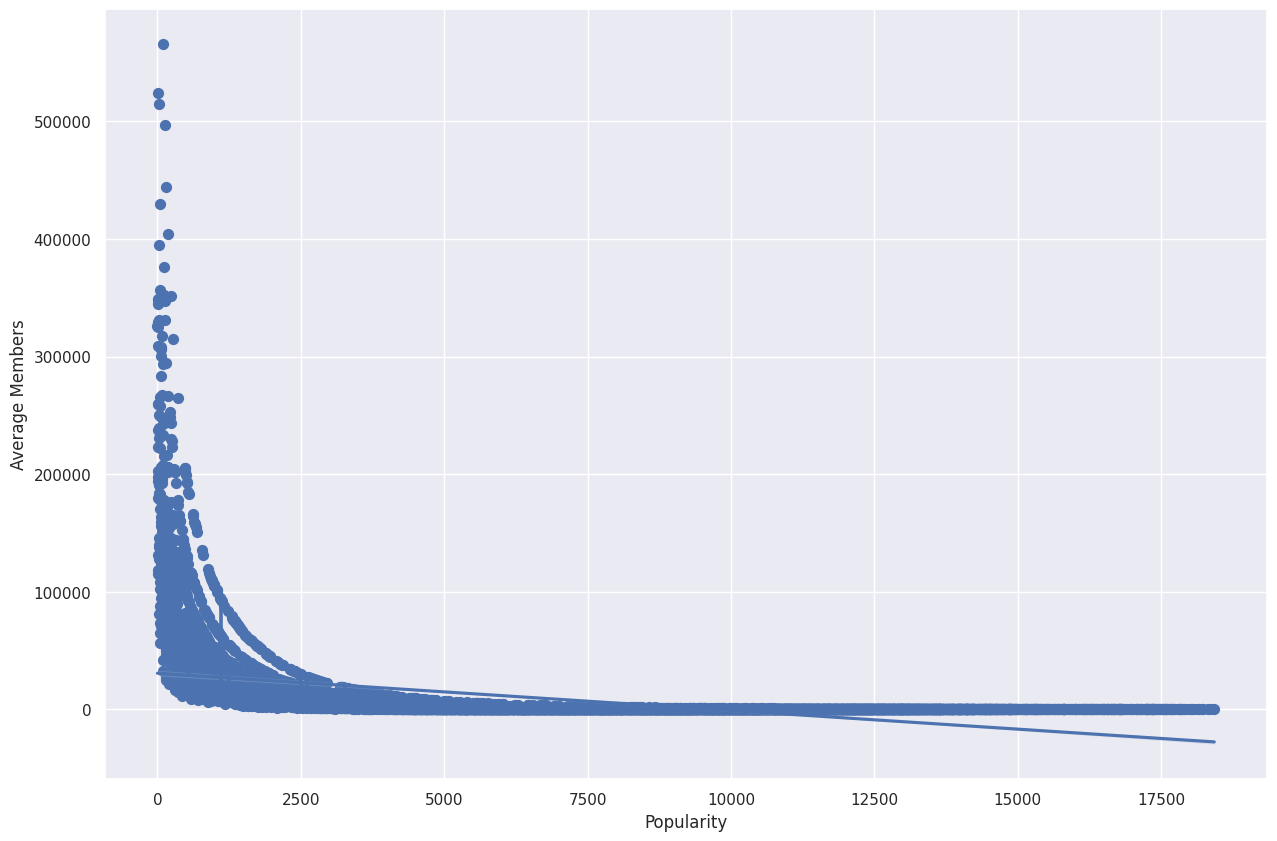

In [16]:
plt.figure(figsize=(15, 10))
sns.regplot(x = "Popularity", y = "Average Members", data = pop_mem_df, x_estimator = np.mean)

***Nhận xét:***

Nhìn vào biểu đồ tương quan trên ta có thể thấy mức độ phổ biến có tác động đến lượng người xem. Khi giá trị độ phổ biến càng tăng thì lượng người xem cũng giảm dần.\
Tuy nhiên trên thực tế vì giá trị độ phổ biến đại diện cho xếp hạng sự phổ biến nên khi giá trị này tăng có nghĩa là độ phổ biến giảm dần. Điều này có nghĩa là người dùng có xu hướng lựa chọn một bộ anime đang "hot". Vậy nên nếu một bộ anime được quảng bá và được phổ biến rộng rãi đến nhiều đối tượng thì số người vì tò mò mà xem bộ anime này cũng sẽ tăng và ngược lại.

### Câu 2: Xu hướng xem anime của mọi người ở thời điểm hiện tại là gì? Một bộ anime gồm những yếu tố nào (kinh dị, trinh thám,...) có thể thu hút người xem?

***Ý nghĩa câu hỏi:*** Trả lời được câu hỏi này, ta có thể được cái nhìn tổng quan về các thể loại anime được quan tâm trong ngành công nghiệp phim những năm gần đây ngoài ra còn đáp ứng nhu cầu các nhóm đối tượng dưới đây:
- Nhà sản xuất: Nắm rõ được yếu tố nào đáp ứng thị hiếu người xem. Từ đó có thể sản xuất ra bộ anime với yếu tố phù hợp, đem lại doanh thu.
- Nhà đầu tư: Lựa chọn những bộ anime có thể loại phù hợp thị hiếu người dùng từ đó phán đoán xem có nên đầu tư vào bộ anime hay không.

***Trả lời:*** 

Vì xu hướng xem anime sẽ thay đổi theo thời gian và ta đang cần xem xét xu hướng xem anime của mọi người thời hiện tại nên ta sẽ lọc và chọn ra dữ liệu của những bộ phim sản xuất từ thời điểm 2010 trở đi và lưu vào dataframe `mod_animes_df`. Sau đó lọc lấy 3 cột là `Genres`, `Members`, `From` và lưu vào dataframe mới là `mod_genres_df`.

In [17]:
mod_animes_df = anime_df[pd.DatetimeIndex(anime_df['From']).year >= 2010].dropna()
mod_genres_df = mod_animes_df[['Genres', 'Members', 'From']]
mod_genres_df

,Genres,Members,From
1,"[Adventure, Fantasy, Action]",310979,2022-10-11
2,"[Comedy, Romance]",703336,2022-04-09
3,"[Drama, Sci-Fi, Suspense]",2338343,2011-04-06
4,"[Sci-Fi, Comedy, Action]",567213,2015-04-08
5,"[Drama, Action]",1972472,2019-04-29
...,...,...,...
9980,[Comedy],1048,2011-04-13
9982,"[Comedy, Ecchi]",38808,2011-01-04
9987,"[Adventure, Fantasy, Action]",36447,2020-04-05
9988,"[Slice of Life, Comedy]",639,2019-04-02


Ta tính lượng người xem trung bình của từng thể loại và lưu vào dataframe `genres_df`

In [18]:
# Lấy năm hiện tại
current_year = datetime.now().year

# Tính số năm từ "From" đến năm hiện tại
mod_genres_df['Years'] = current_year - mod_genres_df['From'].dt.year

# Tính số lượng người xem trung bình cho từng thể loại
genres_avg_members = {}
for idx, row in mod_genres_df.iterrows():
    for genre in row['Genres']:
        if genre not in genres_avg_members:
            genres_avg_members[genre] = []
        genres_avg_members[genre].append(row['Members'] / row['Years'])

# Tính số lượng người xem trung bình cho từng thể loại
result = {genre: sum(avg_members) / len(avg_members) for genre, avg_members in genres_avg_members.items()}

genres_df = pd.DataFrame(list(result.items()), columns=['Genre', 'Average Members'])
genres_df

,Genre,Average Members
0,Adventure,50609.187485
1,Fantasy,53616.265423
2,Action,51815.642079
3,Comedy,32260.983736
4,Romance,51704.191621
5,Drama,56745.967123
6,Sci-Fi,31199.684201
7,Suspense,106416.914126
8,Supernatural,43624.726394
9,Slice of Life,16251.523062


Xem xét lại các thể loại phim

In [19]:
genres_df['Genre'].unique()

array(['Adventure', 'Fantasy', 'Action', 'Comedy', 'Romance', 'Drama',
       'Sci-Fi', 'Suspense', 'Supernatural', 'Slice of Life', 'Mystery',
       'Sports', 'Ecchi', 'Award Winning', 'Boys Love', 'Horror',
       'Gourmet', 'Avant Garde', 'Girls Love'], dtype=object)

***Nhận xét***: Ta cần loại bỏ: Award winning, Avant Garde.\
Đây là 2 thể loại không cần thiết để đưa vào danh sách xem xét vì:
- Award winning: các bộ phim đạt giải
- Avant Garde: các bộ phim tiên phong (cho các thể loại phim mới).\

Đây là hai thể loại khác với những thể loại rõ ràng tường minh

In [20]:
genres_df = genres_df[~genres_df['Genre'].isin(['Award Winning', 'Avant Garde'])]

In [21]:
genres_df

,Genre,Average Members
0,Adventure,50609.187485
1,Fantasy,53616.265423
2,Action,51815.642079
3,Comedy,32260.983736
4,Romance,51704.191621
5,Drama,56745.967123
6,Sci-Fi,31199.684201
7,Suspense,106416.914126
8,Supernatural,43624.726394
9,Slice of Life,16251.523062


Ta thực hiện sắp xếp lại dữ liệu theo hướng giảm dần sau đó trực quan hòa bằng bar chart

In [22]:
genres_df = genres_df.sort_values(by='Average Members', ascending = False)

Trực quan hóa bằng biểu đồ:

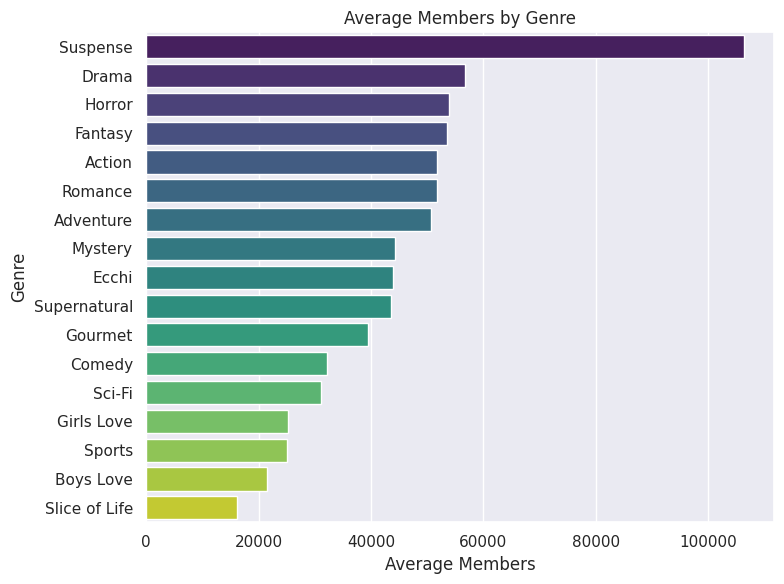

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Average Members', y='Genre', data = genres_df, palette='viridis')
plt.xlabel('Average Members')
plt.ylabel('Genre')
plt.title('Average Members by Genre')
plt.tight_layout()
plt.show()

***Nhận xét:***

- Từ bar chart trên ta có thể thấy nếu có yếu tố `Suspense` trong anime thì có thể thu hút nhiều người xem từ đó đem lại nguồn lợi nhuận tốt hơn. Ngoài ra ta còn có thể cân nhắc các yếu tố khác như `Drama`, `Horror`, `Fantasy`,...

### Câu 3. Thời gian thích hợp để phát hành phim trong năm?

In [24]:
df = anime_df[['Name', 'From']].copy()
df.dropna(inplace=True)
df['Month'] = df['From'].dt.month_name()
df['Year'] = df['From'].dt.year
df = df[df['Year'] >= 2008]

df = df.groupby(['Year', 'Month'])['Name'].count().unstack(level=0)
df = df.reindex(['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'])
df = df.fillna(0)
df

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,
January,26,31,31,30,42,36,58,47,58,54,66,55,72,67,64
February,15,13,13,17,19,14,23,14,22,25,17,23,24,28,28
March,23,17,27,33,32,32,41,29,36,30,33,29,22,29,38
April,53,55,46,61,60,54,69,63,68,84,83,64,65,75,70
May,4,11,9,18,11,12,12,15,23,28,19,19,21,19,14
June,11,20,13,23,20,21,23,23,25,17,25,30,19,25,21
July,35,28,45,51,51,63,63,68,67,68,74,61,49,86,67
August,17,25,19,17,25,26,26,17,25,25,30,30,25,32,24
September,17,12,18,22,28,23,29,22,34,36,24,25,25,28,17


### Visualize

Text(216.25, 0.5, 'Tháng')

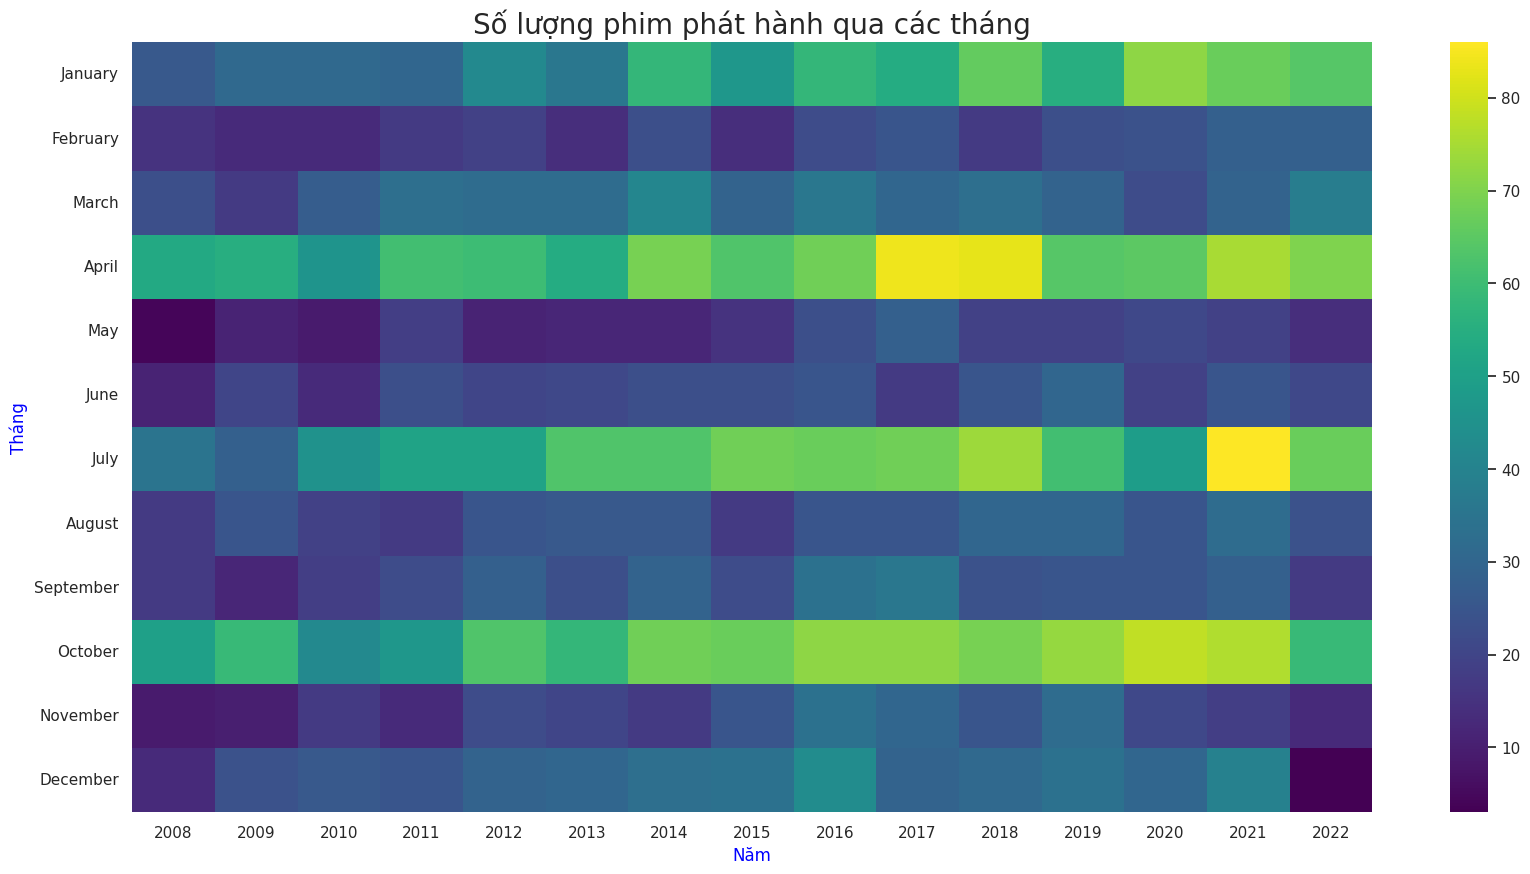

In [25]:
plt.subplots(figsize=(20, 10))
sns.heatmap(data=df,
            cmap='viridis')
plt.title('Số lượng phim phát hành qua các tháng', fontsize='20')
plt.xlabel('Năm', color="blue")
plt.ylabel('Tháng', color="blue")

### Assessment:

Quan sát biểu đồ, ta có thể nhận thấy rằng các nhà sản xuất phim thường ưa chuộng phát hành sản phẩm của họ vào các tháng 1, 4, 7 và 10. Điều này có lẽ là do những thời điểm này thường là những kì nghỉ lớn hoặc ngày lễ, khi mà người hâm mộ có thời gian dành cho việc xem các bộ phim mới.

Nếu quan sát kỹ hơn, có thể thấy rằng việc phân bố này được thực hiện khá đều trong năm, có thể nhằm giảm thiểu sự cạnh tranh giữa các bộ phim, thay vì tập trung vào một khoảng thời gian cụ thể. Tuy nhiên, cũng có sự tập trung ở những thời điểm nhất định để tạo ra sự hấp dẫn mạnh mẽ cho chuỗi các bộ phim mới. Điều này giúp tăng cường sự chú ý và tạo điều kiện thuận lợi cho chiến lược tiếp thị và quảng bá mà không gặp phải sự cạnh tranh quá mức giữa các bộ phim.

### Câu 4. Số lượng lượt xem có bị ảnh hưởng bởi mùa phát hành không? Quan sát những năm gần đây, kiểm tra nếu có sự biến động nào về lượt xem ở các mùa qua từng năm.

In [26]:
def calculate_average_members(row):
    if current_year == row["FromYear"]:
        average_members = row["Members"]
    else:
        years_passed = current_year - row["FromYear"]
        average_members = row["Members"] / years_passed
    return int(average_members)

In [27]:
season_df = anime_df[["Premiered", "Members", "From"]].copy()
season_df["FromYear"] = pd.DatetimeIndex(season_df['From']).year
season_df = season_df.dropna()
season_df["AverageMembers"] = season_df.apply(calculate_average_members, axis=1)
season_df

,Premiered,Members,From,FromYear,AverageMembers
0,Spring,3037641,2009-04-05,2009.0,202509
1,Fall,310979,2022-10-11,2022.0,155489
2,Spring,703336,2022-04-09,2022.0,351668
3,Spring,2338343,2011-04-06,2011.0,179872
4,Spring,567213,2015-04-08,2015.0,63023
...,...,...,...,...,...
9987,Spring,36447,2020-04-05,2020.0,9111
9988,Spring,639,2019-04-02,2019.0,127
9990,Winter,1064,1982-02-13,1982.0,25
9991,Spring,954,1983-04-09,1983.0,23


In [28]:
genres_df = anime_df[["Genres", "Members", "From"]].copy()
genres_df = genres_df.dropna()
genres_df["FromYear"] = pd.DatetimeIndex(genres_df['From']).year
max_year = genres_df["FromYear"].max()
ten_nearest_years = max_year - 10
season_df = season_df[season_df["FromYear"] >= ten_nearest_years]
season_df

,Premiered,Members,From,FromYear,AverageMembers
1,Fall,310979,2022-10-11,2022.0,155489
2,Spring,703336,2022-04-09,2022.0,351668
4,Spring,567213,2015-04-08,2015.0,63023
5,Spring,1972472,2019-04-29,2019.0,394494
8,Fall,296566,2012-10-04,2012.0,24713
...,...,...,...,...,...
9976,Fall,5697,2021-10-03,2021.0,1899
9978,Winter,22989,2020-01-07,2020.0,5747
9987,Spring,36447,2020-04-05,2020.0,9111
9988,Spring,639,2019-04-02,2019.0,127


In [29]:
season_mem = season_df.groupby(["FromYear", "Premiered"])["AverageMembers"].sum().to_frame()
temp = season_mem.reset_index()
temp

,FromYear,Premiered,AverageMembers
0,2012.0,Fall,1262583
1,2012.0,Spring,734319
2,2012.0,Summer,614455
3,2012.0,Winter,618230
4,2013.0,Fall,1156565
5,2013.0,Spring,994341
6,2013.0,Summer,717181
7,2013.0,Winter,445821
8,2014.0,Fall,1628028
9,2014.0,Spring,1462184


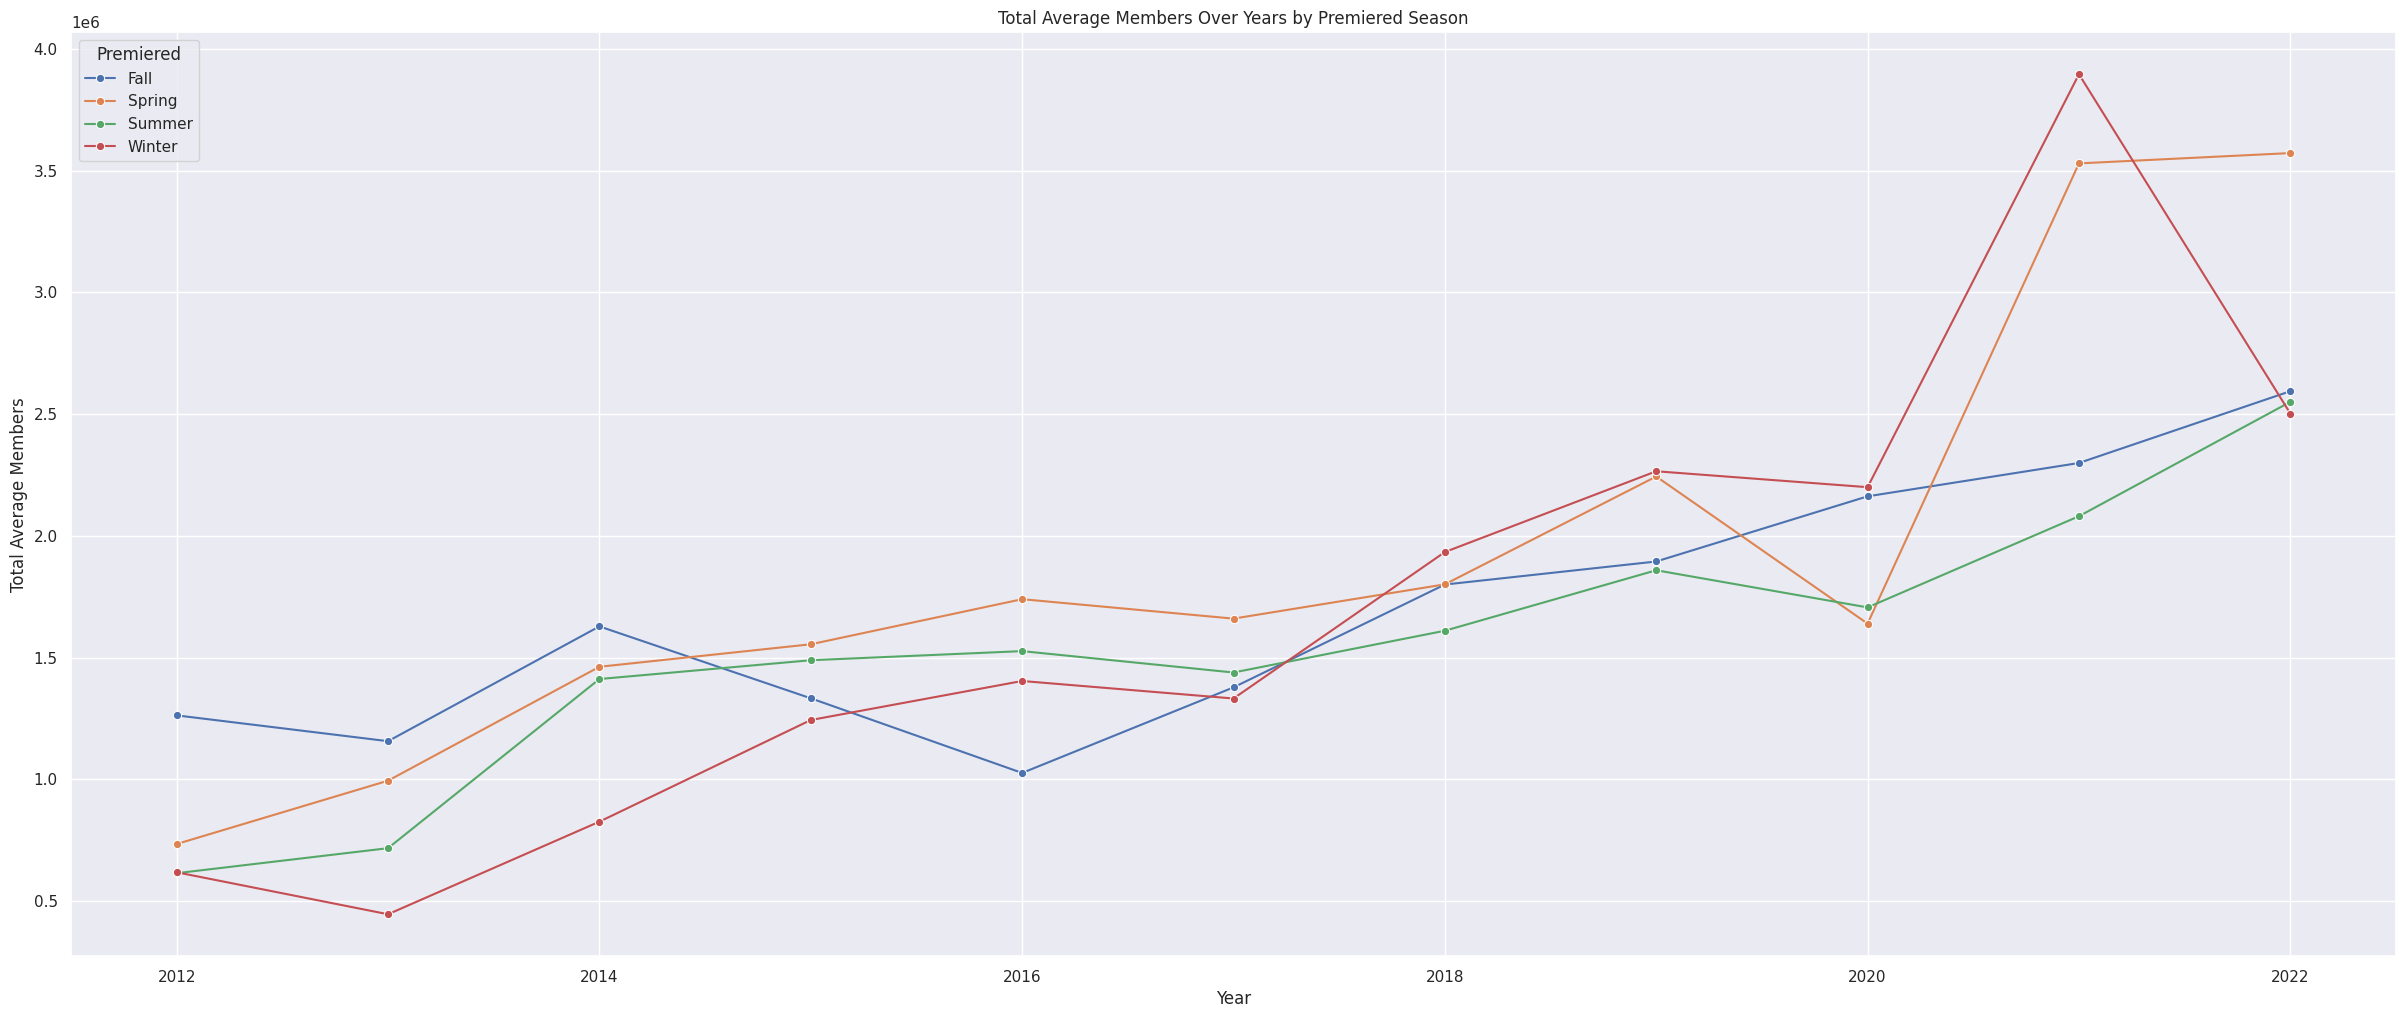

In [30]:
fig, ax = plt.subplots(figsize=(30, 12))

sns.lineplot(data=temp, x="FromYear", y="AverageMembers", hue="Premiered", marker='o', ax=ax)

ax.set_xlabel('Year')
ax.set_ylabel('Total Average Members')
ax.set_title('Total Average Members Over Years by Premiered Season')
plt.show()

#### Assessment: 
Nhìn chung, tổng số lượt xem trung bình qua các mùa không có sự chênh lệch đáng kể và có thể nhận thấy một xu hướng tăng theo từng năm. Năm 2021 đánh dấu điểm cao nhất, tăng đột ngột số lượng người xem, đặc biệt là trong các mùa xuân và đông. Có thể giải thích điều này bằng việc đang trong giai đoạn đại dịch COVID-19, khiến cho người xem tăng lên do nhiều người ở nhà và thưởng thức anime. Điều này đặc biệt đúng vào các mùa xuân và đông, là hai mùa thường có nhiều kì nghỉ lễ.

# Data Modeling - Mô hình hóa dữ liệu
### I. Introduction - Giới thiệu:

MyAnimeList, thường được viết tắt là MAL, là một trang web ứng dụng danh mục xã hội và mạng xã hội anime và manga được điều hành bởi các tình nguyện viên. Trang web cung cấp cho người dùng một hệ thống giống như danh sách để sắp xếp và chấm điểm anime và manga. Nó tạo điều kiện thuận lợi cho việc tìm kiếm những người dùng có cùng sở thích và cung cấp cơ sở dữ liệu lớn về anime và manga. Tính đến tháng 1 năm 2023, trang này báo cáo có khoảng 23.000 mục anime và 62.000 mục manga. Năm 2015, trang web này nhận được 120 triệu lượt truy cập mỗi tháng.

Dựa trên thông tin thu thập từ dữ liệu, mục tiêu của nhóm chúng em trong việc mô hình hóa dữ liệu là đánh giá chất lượng của các bộ anime dựa trên số lượng người xem và số lượng người yêu thích. Điều này cho phép nhóm sử dụng các thông số thống kê của các bộ anime mới để dự đoán mức độ chất lượng của chúng.


### II. Analyze and select features with high relevance and importance - Phân tích, lựa chọn các đặc trưng có mức độ liên quan cao và quan trọng:
Sau khi nhóm nghiên cứu, phương pháp tính điểm trên MAL cho từng anime dựa vào đánh giá của toàn bộ cộng đồng người dùng và số lượng người xem bộ đó. Vì không thể biết được cách mà từng người dùng đánh giá, nhóm quyết định thử dự đoán điểm số thông qua các thông tin có sẵn. Nhóm xem xét một số đặc trưng quan trọng như sau:

1. **Members (Số lượng người xem):** Chúng tôi lựa chọn đặc trưng này vì nó ảnh hưởng đến tiêu chí tính điểm của MAL.

2. **Favorites (Số lượng người yêu thích):** Do không có cách nào biết được cách đánh giá của từng người xem, chúng tôi quyết định đánh giá dựa trên số lượng người yêu thích. Nếu một anime có nhiều người yêu thích, khả năng cao là điểm số của nó cũng sẽ tăng lên.

3. **From (Năm phát hành):** Với những bộ anime mới, việc đạt được mức lượng người xem và người yêu thích cao có thể khó khăn. Đặc trưng này giúp chúng tôi xem xét thời gian tồn tại của anime, vì những bộ phim mới có thể đạt được vị thế cao một cách dễ dàng.

### III. Model Selection - Lựa chọn mô hình:

Do bài toán yêu cầu dự đoán điểm số của một bộ phim và dữ liệu liên quan đều có định dạng số, nên nhóm quyết định áp dụng các mô hình hồi quy. Trong khuôn khổ của nhiệm vụ, nhóm đã lựa chọn hai mô hình cụ thể để triển khai và so sánh, đó là Linear Regression và K-Nearest-Neighbors Regression. Lựa chọn này dựa trên đặc tính của dữ liệu, với hi vọng rằng những mô hình này sẽ mag lại hiệu suất đáng kể trong việc dự đoán điểm số cho các bộ phim.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

In [32]:
df = anime_df[['Score', 'Members', 'Favorites', 'From']].copy()
df['Years'] = df['From'].dt.year
df.drop(columns=['From'], inplace=True)
df.dropna(inplace=True)
df.head()

,Score,Members,Favorites,Years
0,9.11,3037641,211082,2009.0
1,9.10,310979,11798,2022.0
2,9.09,703336,25895,2022.0
3,9.08,2338343,177381,2011.0
4,9.07,567213,15323,2015.0


###### Phân chia dữ liệu thành hai phần: tập huấn luyện (training) và tập kiểm thử (testing).

Lý do: Nếu sử dụng cùng một tập dữ liệu cho cả quá trình huấn luyện và kiểm thử, có thể gây hiện tượng học thuộc lòng, làm cho mô hình đánh giá có tỉ lệ chính xác cao, thậm chí lên đến 100%, dẫn đến hiện tượng quá mức khớp (overfitting). Vì vậy, chúng ta cần phải tách tập dữ liệu ban đầu thành hai phần riêng biệt để sử dụng cho quá trình huấn luyện và kiểm thử. Trong trường hợp này, nhóm sẽ phân chia như sau:
- Tập huấn luyện: 80% dữ liệu
- Tập kiểm thử: 20% dữ liệu

In [33]:
X=df.drop(columns=['Score'])
y=df['Score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### **III.1. Linear Regression:**

- Phân tích hồi quy tuyến tính là phương pháp để xem xét mối quan hệ giữa biến phụ thuộc Y và một hoặc nhiều biến độc lập X. Mô hình hóa này sử dụng hàm tuyến tính (bậc 1), và các tham số của mô hình (hoặc hàm số) được ước lượng dựa trên dữ liệu.

- Hồi quy tuyến tính được ứng dụng phổ biến trong thực tế do tính đơn giản hóa của nó trong việc mô tả mối quan hệ giữa các biến. Sự dễ dàng trong quá trình ước lượng tham số làm cho nó trở thành một công cụ phân tích mạnh mẽ.

In [34]:
linear_model_pipeline = Pipeline([('model', LinearRegression())])
linear_model_pipeline.fit(X_train, y_train)
predictions = linear_model_pipeline.predict(X_test)

Text(0, 0.5, 'Predicted Values')

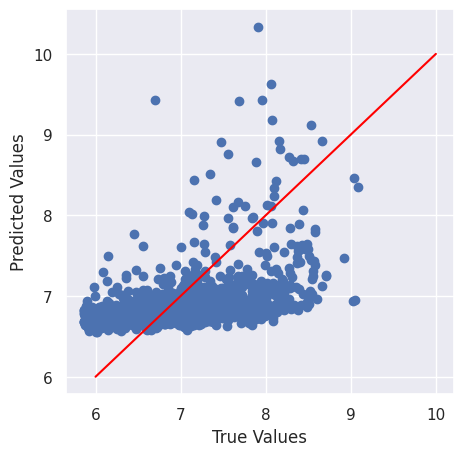

In [35]:
# Visualize
plt.figure(figsize=(5, 5))
plt.scatter(y_test, predictions)
plt.plot([6, 10], [6, 10], color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

#### Assessment: 
Ta nhận thấy rằng: các điểm được vẽ có xu hướng tập trung gần đường chéo, cho thấy mô hình có khả năng dự đoán gần đúng số điểm của các bộ anime. Mặc dù không hoàn toàn chính xác, kết quả vẫn nằm trong mức tạm chấp nhận. Nhóm sẽ tính độ lỗi bằng Mean Squared Error (MSE) để đánh giá hiệu suất của mô hình.

In [36]:
# Sử dụng MSE để đo độ lỗi
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.33657653713802377


#### Assessment: 
Ta có thể thấy đây là một mô hình tương đối tốt vì độ lỗi khá thấp.

### III.2. K-Nearest Neighbors Regression:
K-Nearest Neighbors Regression (k-NN Regression) là một phương pháp hồi quy trong thống kê và máy học. Trong k-NN Regression, giá trị dự đoán của một điểm dữ liệu mới được tính bằng cách lấy trung bình của giá trị đầu ra của k điểm dữ liệu gần nhất từ tập dữ liệu huấn luyện. Điều này làm cho k-NN Regression trở thành một phương pháp linh hoạt và đơn giản cho việc dự đoán giá trị liên tục dựa trên thông tin từ các điểm láng giềng. Không gian thuộc tính xác định độ tương đồng giữa các điểm dữ liệu, và k-NN Regression thường được ứng dụng trong các vấn đề liên quan đến dự đoán và ước lượng giá trị.

Mô hình này cần được cung cấp tham số k (nearest neighbors). Ta sử dụng tham số mặc định của sklearn cho k là 5.

In [37]:
knn_model = Pipeline([('model', KNeighborsRegressor())])
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

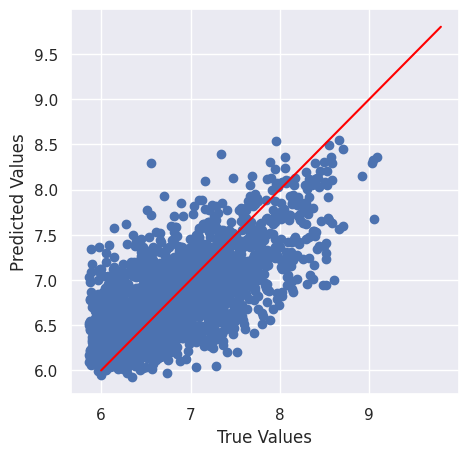

In [38]:
plt.figure(figsize=(5, 5))
plt.plot(np.arange(6, 10, 0.2), np.arange(6, 10, 0.2), color='red')
plt.scatter(y_test, knn_predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

#### Assessment: 
So với Linear Regression, mô hình KNN thể hiện tốt hơn. Vì các điểm dữ liệu gần như nằm sát đường chéo, nhóm sẽ tính độ lỗi MSE để so sánh với mô hình trước đó và đánh giá hiệu suất của mô hình hiện tại.

In [39]:
# Sử dụng MSE để đo độ lỗi
mse_knn_default = mean_squared_error(y_test, knn_predictions)
print(f"Mean Squared Error (MSE) for k-NN Regression: {mse_knn_default}")

Mean Squared Error (MSE) for k-NN Regression: 0.23014541896024462


#### Comparision: 
Với k=5. Ta thấy, độ lỗi của mô hình Linear Regression cao hơn mô hình KNN.

### III.3. Feature Scaling:
Feature scaling là một quy trình trong xử lý dữ liệu, nhằm đồng bộ hóa hoặc chuẩn hóa giá trị của các đặc trưng (features) trong tập dữ liệu. Mục tiêu chính của feature scaling là giữ cho các đặc trưng có cùng thang đo, đảm bảo rằng chúng không ảnh hưởng quá mức đến hiệu suất của các mô hình máy học. 

Ba phương pháp chính của Feature Scaling:
- Min-Max Scaling (Normalization): Phương pháp này chuyển đổi giá trị của các đặc trưng sao cho chúng nằm trong khoảng giới hạn cụ thể, thường là từ 0 đến 1.
- Standard Scaling (Z-score Normalization): Chuyển đổi giá trị của các đặc trưng sao cho chúng có giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1. 
- Robust Scaling: Phương pháp này dựa trên tỷ lệ tức là chia giá trị của đặc trưng cho phạm vi tương đối giữa giá trị 25 và giá trị 75 trong tập dữ liệu. Điều này giúp giảm ảnh hưởng của giá trị ngoại lai.

Nhóm em chọn Standard Scaling để scale bài toán này.

In [40]:
scaler = StandardScaler()
knn_model = KNeighborsRegressor()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

Text(0, 0.5, 'Predicted Values')

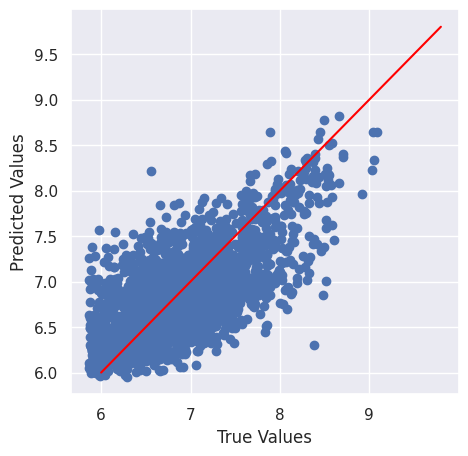

In [41]:
plt.figure(figsize=(5, 5))
plt.plot(np.arange(6, 10, 0.2), np.arange(6, 10, 0.2), color='red')
plt.scatter(y_test, knn_predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [42]:
# Sử dụng MSE để đo độ lỗi
mse_knn_standard = mean_squared_error(y_test, knn_predictions)
print(f"Mean Squared Error (MSE): {mse_knn_standard}")

Mean Squared Error (MSE): 0.21403938430173292


#### Assessment: 
Độ lỗi MSE đã giảm sau khi sử dụng Standard Scaling 

### IV. Refine:
#### IV.1. Fine-tune parameters - Tinh chỉnh tham số:
Tinh chỉnh tham số là một bước quan trọng trong quá trình xây dựng mô hình. Ban đầu, chúng ta áp dụng mô hình k-NN với tham số k=5. Tuy nhiên, giá trị k=5 không chắc chắn làm cho mô hình có độ lỗi thấp nhất.

Để xác định tham số k tối ưu nhất cho mô hình, nhóm quyết định sử dụng lớp GridSearchCV và kỹ thuật cross-validation có sẵn trong thư viện sklearn. Quá trình này thực hiện cross-validation bằng cách chia bộ dữ liệu thành 5 phần, nhằm đánh giá hiệu suất của mô hình với nhiều giá trị k khác nhau để đảm bảo tính tổng quát của kết quả đánh giá.

Chúng ta xét giá trị k trong khoảng từ 1 đến 50 và lựa chọn giá trị k có điểm đánh giá cao nhất, đồng thời giúp tối ưu hóa hiệu suất của mô hình.

#### IV.2. Build a scoring function - Xây dựng hàm:
Nhóm sẽ đánh giá theo MSE. Vì độ lỗi càng thấp thì model càng hiệu quả nên điểm sẽ được tính bằng: -MSE

In [43]:
# Hàm tính điểm để đánh giá
def mse_score(y_true,y_predict):
    return -mean_squared_error(y_true,y_predict)

In [44]:
knn_model = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())])

grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid={'model__n_neighbors': np.arange(1, 50)},
    scoring={'mse': make_scorer(mse_score)},
    refit='mse',
    cv=5
)

grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             refit='mse', scoring={'mse': make_scorer(mse_score)})

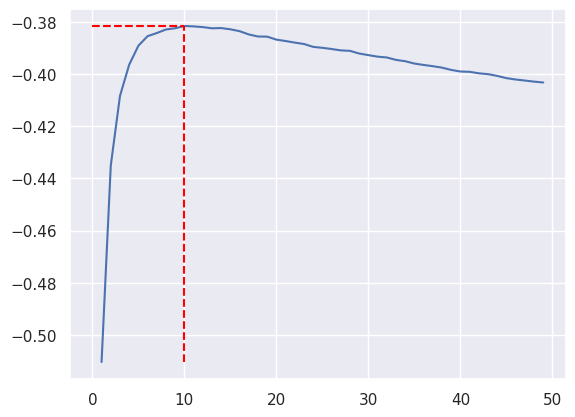

In [45]:
# Điểm đánh giá của từng giá trị k
df_result = pd.DataFrame(grid_search.cv_results_)

plt.plot(df_result['param_model__n_neighbors'], df_result['mean_test_mse'])

best_index = list(df_result['param_model__n_neighbors']).index(grid_search.best_params_['model__n_neighbors'])
best = (
    list(df_result['param_model__n_neighbors'])[best_index],
    list(df_result['mean_test_mse'])[best_index]
)

plt.plot([best[0], best[0]], [df_result['mean_test_mse'].min(), best[1]], linestyle='dashed', color='red')
plt.plot([0, best[0]], [best[1], best[1]], linestyle='dashed', color='red')

In [46]:
# Tham số k có điểm đánh giá cao nhất
best_k_value = grid_search.best_params_['model__n_neighbors']
print(f"Best value for k: {best_k_value}")

Best value for k: 10


In [47]:
# Mô hình k-NN với tham số k tốt nhất
best_k_value = grid_search.best_params_['model__n_neighbors']

knn_model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=best_k_value))
])

knn_model1.fit(X_train, y_train)
knn_predictions = knn_model1.predict(X_test)

Text(0, 0.5, 'Predicted Values')

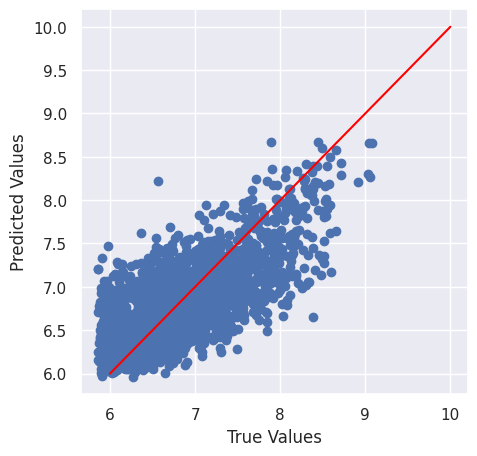

In [48]:
# Visualize
plt.figure(figsize=(5, 5))
plt.plot([6, 10], [6, 10], color='red')
plt.scatter(y_test, knn_predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [49]:
# Sử dụng MSE để đo độ lỗi
mse_knn = mean_squared_error(y_test, knn_predictions)
print(f"Mean Squared Error (MSE): {mse_knn}")

Mean Squared Error (MSE): 0.2039749087665647


#### Assessment:
Quan sát kết quả ta thấy, mô hình làm việc khá tốt đối với tập dữ liệu này. Được thể hiện ở độ lỗi khi cả hai đều cho ra độ lỗi khá thấp:
- 0.3 (Linear Regression).
- 0.2 (K-Nearest Neighbors Regression).

#### IV.3. Evaluation of two models:
Dựa trên kết quả độ lỗi MSE, mô hình Linear Regression và K-Nearest Neighbors Regression được đánh giá như sau:

- **Linear Regression:** Mô hình này dựa trên giả định về mối quan hệ tuyến tính giữa các biến độc lập và biến phụ thuộc. Kết quả MSE cho thấy mức độ chính xác của mô hình trên tập kiểm thử.

- **K-Nearest Neighbors Regression (k-NN):** Mô hình này sử dụng thông tin từ k hàng xóm gần nhất để dự đoán giá trị. Độ lỗi MSE cho biết mức độ chính xác của mô hình với giả sử về sự tương đồng giữa các điểm dữ liệu.

Thông qua những dữ liệu trên, ta nhận thấy KNN thể hiện tốt hơn một chút so với Linear Regression.

Tùy thuộc vào bài toán và đặc điểm của dữ liệu, một trong hai mô hình có thể phù hợp tốt hơn. Đánh giá cụ thể hơn có thể được thực hiện bằng cách so sánh các chỉ số đánh giá khác như R-squared, đồng thời cân nhắc đến sự phức tạp của mô hình và đặc điểm của dữ liệu cụ thể.

# THANKS FOR READING!